In [4]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from scipy.signal import detrend
from scipy.stats import zscore
sys.path.append('/home/om2382/scaling_analysis/')
from PopulationCoding.PopulationCoding.dimred import SVCA
sys.path.append('/home/om2382/mft-theory/')
from empirics import random_derangement, shared_variance_components_analsys

In [2]:
data_dir = '/mnt/smb/locker/litwin-kumar-locker/om2382/'
small_file_name = '20210311_left_1p2mm_FOV_50_550um_depth_65percent_60min_no_stim.h5'
T_N_file_name = '20210305_both_6mm_FOV_50_550um_depth_350mW_60min_no_stim_M1.h5'
N_T_file_name = '20210305_both_6mm_FOV_50_550um_depth_350mW_60min_no_stim_M1_transpose.h5'

In [3]:
with h5py.File(os.path.join(data_dir, N_T_file_name), 'r') as f:
    X = f['T_all_transpose'][:,:]
with h5py.File(os.path.join(data_dir, T_N_file_name), 'r') as f:
    Y = f['T_all'][:,:]

In [5]:
with h5py.File(os.path.join(data_dir, T_N_file_name), 'r') as f:
    M = f['motion'][:,:]

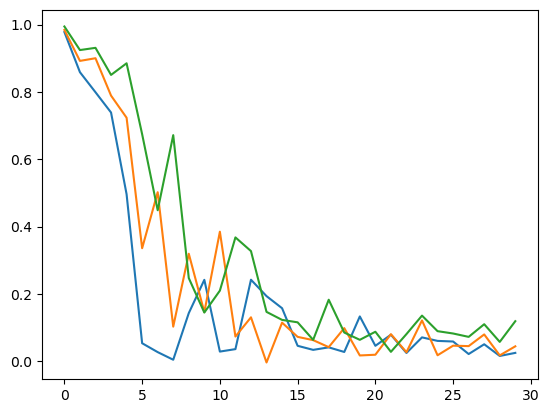

In [27]:
### --- Subsample neurons and demean --- ###
#subset_size = 3000
for subset_size in [10000, 20000, 50000]:
    idx_subset = np.random.choice(list(range(X.shape[0])), subset_size, replace=False)
    X_subset = X[idx_subset,:]
    X_subset = X_subset - X_subset.mean(1)[:,None]
    Y_subset = X_subset.T

    N = X_subset.shape[0]
    T = X_subset.shape[1]

    ntrain = sorted(np.random.choice(range(0, N), N//2, replace=False))
    ntest = sorted(list(set(range(0,N)) - set(ntrain)))

    T_checkerboard = 144 #samples, not seconds
    T_indices = np.array(range(0, T // T_checkerboard * T_checkerboard))
    T_indices = T_indices.reshape((-1, T_checkerboard))
    itrain = T_indices[0::2].flatten()
    itest = T_indices[1::2].flatten()

    sneur, vneur, u, v, pca = SVCA(X_subset, ntrain, ntest, itrain, itest, n_randomized=30)
    plt.plot(sneur/vneur)

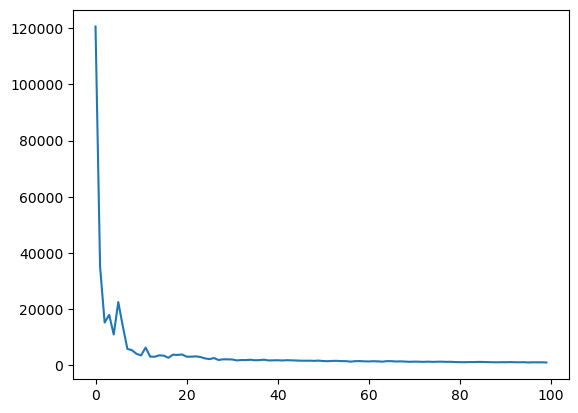

In [26]:
plt.plot(vneur)

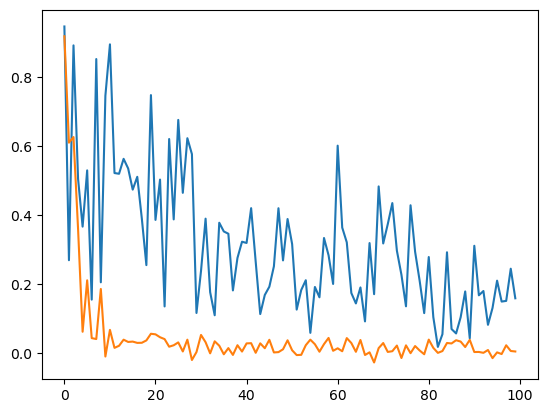

In [22]:
#plt.plot(percent_reliable_var[:100])
plt.plot(sneur/vneur)

In [15]:
sneur

array([6824.619   , 1564.1046  ,  735.66095 ,  519.15283 ,  157.1719  ,
        337.3925  ,   99.623726,   76.68764 ,  216.64104 ,  -13.743225],
      dtype=float32)